# ML1 : Machine Learning with Pokemon

In this workshop we will go through the ML engineering process with a real dataset. We will be implementing each of the machine learning models that we discussed in ML0 and evaluate their performances. 

## Our Data
We will be looking at a pokemon data meant to resemble a pokedex. It's not update to take into account the most recent pokemon but had data for 800 different ones.

#### Importing Data

In [2]:
import pandas as pd
import numpy as np

pokemon = pd.read_csv('pokemon.csv')

## Data Cleaning
First lets look at our data by taking a sample of it.

In [3]:
pokemon.sample(5)

,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
129,120,Staryu,Water,NaN,340,30,45,55,70,55,85,1,False
540,483,Dialga,Steel,Dragon,680,100,120,120,150,100,90,4,True
233,215,Sneasel,Dark,Ice,430,55,95,55,35,75,115,2,False
45,40,Wigglytuff,Normal,Fairy,435,140,70,45,85,50,45,1,False
74,68,Machamp,Fighting,NaN,505,90,130,80,65,85,55,1,False


The first column in not needed so we will get rid of it

In [4]:
pokemon = pokemon.drop(columns=['#','Name'])

In [5]:
pokemon.sample()

,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
250,Ground,NaN,330,90,60,60,40,40,40,2,False


This data has already been preprocessed before us, so we don't have much to do here.

## Exploratory Data Analysis

Now that we have clean data lets do some EDA before we get into the ML

#### Importing Seaborn

In [6]:
import seaborn as sns
import matplotlib.pyplot as plt

# Setting style preferences for seabron
sns.set(style = 'darkgrid', color_codes = True)

def setplt(x = 13, y = 9, a = 1, b = 1):
    f, ax = plt.subplots(a,b,figsize = (x,y))
    sns.despine(f, left = True, bottom = True)
    return f, ax

We can make scatterplots comparing all the features

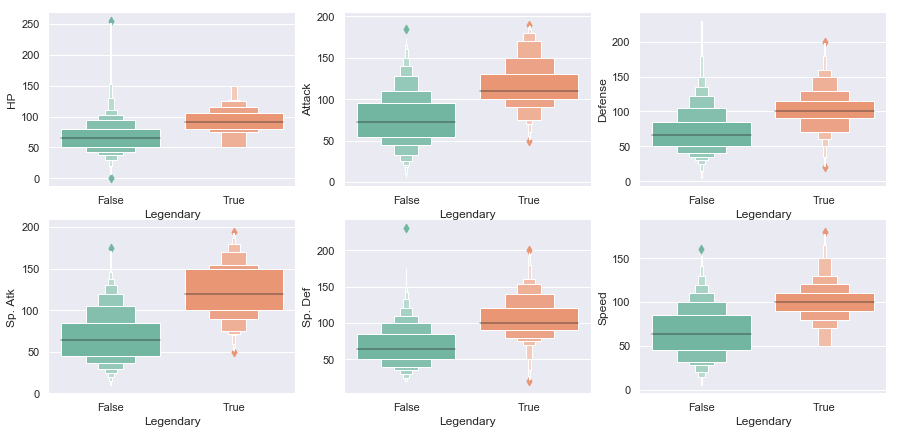

In [7]:
# Setting up subplots
f, ax = setplt(15,7,2,3)

# Plotting 
v_plot = sns.boxenplot(x = 'Legendary', y = "HP", data = pokemon, palette = "Set2", ax = ax[0][0])
v_plot = sns.boxenplot(x = 'Legendary', y = "Attack", data = pokemon, palette = "Set2", ax = ax[0][1])
v_plot = sns.boxenplot(x = 'Legendary', y = "Defense", data = pokemon, palette = "Set2", ax = ax[0][2])
v_plot = sns.boxenplot(x = 'Legendary', y = "Sp. Atk", data = pokemon, palette = "Set2", ax = ax[1][0])
v_plot = sns.boxenplot(x = 'Legendary', y = "Sp. Def", data = pokemon, palette = "Set2", ax = ax[1][1])
v_plot = sns.boxenplot(x = 'Legendary', y = "Speed", data = pokemon, palette = "Set2", ax = ax[1][2])

Above we can see that we can see clear distinctions in the rank when related to the other features. We can try to see if these features have any effect on other classes like discipline and sex and see that there is no relation.

### Our Objective

Our goal for this workshop is to come up with the most efficient model to predict the rank e.i. Associate Professor, Assistant Professor, or Professor (tenured). We are given the stats for each professor such as the years they have worked, salary, and the years they have had thier PhD.

<br>

## Preparing our Data

We now have to prepare out features and labels. We will also then have to create our training and testings sets. But first we need to replace some of the features with numerical values since out ML models will not take in strings. For example our disciple feature.

<br>

####  Encoding Labels
ML models can't take in string values so they mush be converted to numerical values<br>
<br>
We needs to map the two types columns together so that similar types across columns won't have different labels

In [8]:
type_unique = list(set().union(pokemon['Type 1'].unique(),pokemon['Type 2'].unique()))
type_map = dict(zip(type_unique, range(len(type_unique))))

type_mapping = lambda x : type_map[x]

pokemon['Type 1'] = pokemon['Type 1'].apply(type_mapping)
pokemon['Type 2'] = pokemon['Type 2'].apply(type_mapping)
pokemon[['Type 1','Type 2']].sample(5)

,Type 1,Type 2
741,8,3
463,1,13
211,15,3
151,4,5
668,16,0


#### Creating our Features

In [9]:
features = pokemon.drop(columns=['Legendary'])
features.head(2)

,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation
0,8,2,318,45,49,49,65,65,45,1
1,8,2,405,60,62,63,80,80,60,1


#### Creating our Labels

In [10]:
labels = pokemon.Legendary
labels.head(2)

0    False
1    False
Name: Legendary, dtype: bool

### Train-Test-Split

In [11]:
from sklearn.model_selection import train_test_split

X = features
y = labels

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20)

print('Shape of training features : \t' + str(X_train.shape))
print('Shape of training labels : \t' + str(y_train.shape))
print('Shape of testing features : \t' + str(X_test.shape))
print('Shape of testing labels : \t' + str(y_test.shape))

Shape of training features : 	(640, 10)
Shape of training labels : 	(640,)
Shape of testing features : 	(160, 10)
Shape of testing labels : 	(160,)


## Finding the Best Model

Now we will go through the ML models we discussed in ML0. We will create a classifier using each of these algorithms and evaluate them to see which one gives us the best performance. <br>
<br>- K-Nearest-Neighbors
<br>- Random Forest
<br>- Support Vector Machine
<br>- Neural Network

### K-Nearest-Neighbors Classification

First we will try the KNN algorithm to create a KNN Classifier
<br><br>
Documentation:
https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html#sklearn.neighbors.KNeighborsClassifier.kneighbors

In [12]:
# Importing Classifier from Sci-Kit Learn
from sklearn.neighbors import KNeighborsClassifier

# Initializing the KNN Classifier
knn = KNeighborsClassifier(n_neighbors = 5)
 
# Training model
knn.fit(X_train, y_train)

# Evaluating Method
knn.score(X_test, y_test)

0.95625

##### Tuning Parameters

In [13]:
knn.get_params()

{'algorithm': 'auto',
 'leaf_size': 30,
 'metric': 'minkowski',
 'metric_params': None,
 'n_jobs': 1,
 'n_neighbors': 5,
 'p': 2,
 'weights': 'uniform'}

We want to find the value for n_neighbors to get us the best accuracy

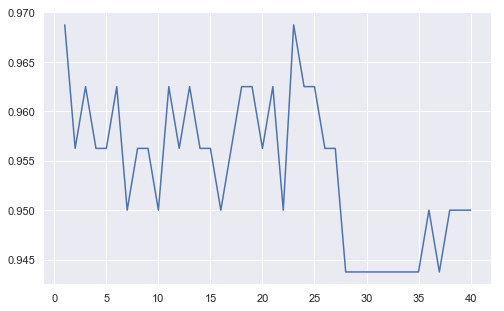

In [14]:
acc_list = []
for x in range(1,41):
    knn = KNeighborsClassifier(n_neighbors = x)
    knn.fit(X_train, y_train)
    acc_list.append(knn.score(X_test, y_test))

setplt(8,5)
sns.lineplot(x = range(1,41), y = acc_list)

In [15]:
knn_final = KNeighborsClassifier(n_neighbors=1)
knn_final.fit(X_train,y_train)
print('Accuracy : ' + str(knn_final.score(X_test, y_test)))

Accuracy : 0.96875


##### Predictions

In [16]:
knn_final.predict(X_test)

array([False, False, False, False, False, False, False, False, False,
        True, False, False, False, False, False, False, False, False,
       False, False, False, False,  True, False, False, False,  True,
       False, False, False, False, False, False, False,  True, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False,  True, False,  True,
       False, False, False, False, False, False, False, False, False,
       False,  True, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False,  True, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False,  True, False, False,  True,
       False, False,

### Random Forest Classification

Now that we have an accuracy for our KNN model lets try and see if we can get better performance with out RF algorithm since 0.775 is not considered to be very accurate

In [17]:
# Import RF Classifier
from sklearn.ensemble import RandomForestClassifier

# Initialize the Random Forest
rf = RandomForestClassifier(n_estimators=10, criterion='gini') # Using Gini index to measure feature importance 

# Train Model
rf.fit(X_train, y_train)

# Test
rf.score(X_test, y_test)

0.95625

##### Tuning Parameters

Here we will have to tune our n_estimators parameter. There are others such as the criterion (above), bootstrapping, max_features, etc... For this our case we can simply use the default values that sklearn RFC gives us, and will mainly worry about the number of trees. Hence, we will tune the parameters similar to the way we did with KNN.

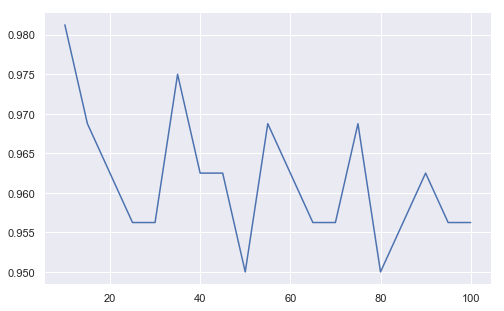

In [18]:
acc_list = []
for x in range(10,101,5):
    rf = RandomForestClassifier(n_estimators = x)
    rf.fit(X_train, y_train)
    acc_list.append(rf.score(X_test, y_test))


setplt(8,5)
sns.lineplot(x = range(10,101,5), y = acc_list)

Look for the best performance and try that.

In [66]:
rf_final = RandomForestClassifier(n_estimators = 10)
rf_final.fit(X_train, y_train)
print( 'Accuracy : ' + str(rf_final.score(X_test, y_test)))

Accuracy : 0.975


<b>NOTE : </b> Since the creating of the model is randomized and not uniform like KNN, there will be a different testing accuracy every time because different bootstraps are being used to create our random forest every time we train. If you keep running the block above, the accuracy will be constantly changing.


#### Why did the RFC do better?
Our RFC model did pretty well compared to the KNN model. This is because this data can be easily categorized. Notice in the pairplots we made above the data can be seperated visually but there is a lot of overlap between the classes. Because of this KNN might have worse performance towards the edges. Random Forest allows us to make more reasonable distinctions using feature values.

### Support Vector Machine Classification

Now we will try to use the SVC algorithm to create a classification model


In [67]:
# Importing SVC
from sklearn.svm import SVC

# Initialize the SVC
svc = SVC()  # Use defualt paramters for now

# Train Model
svc.fit(X_train, y_train)

# Test Model
svc.score(X_test, y_test)

0.925

##### Tuning Parameters

In [68]:
svc.get_params()

{'C': 1.0,
 'cache_size': 200,
 'class_weight': None,
 'coef0': 0.0,
 'decision_function_shape': 'ovr',
 'degree': 3,
 'gamma': 'auto',
 'kernel': 'rbf',
 'max_iter': -1,
 'probability': False,
 'random_state': None,
 'shrinking': True,
 'tol': 0.001,
 'verbose': False}

In this case we want to find the best combination of parameters since we will be chaning more than one paramter. Lets define the ones we want to change. Since we are working with the RBF kernel (we have more than three features so this is optimal) we will have to optimize the C and gamma parameters.

In [69]:
param_grid = {'C':[1.0, 0.1, 0.001],        # C = penalty of the error term
              'gamma':[0.1, 0.01, 0.001]}   # gamma = the kernel coefficient

Sci-Kit Learn has a very useful tool called the GridSearch. This makes finding the best paramters more simple but it essentially still uses trial and error.

In [70]:
# Importing GridSearch
from sklearn.model_selection import GridSearchCV

# Initialize the GridSearch 
gridsearch = GridSearchCV(SVC(), param_grid)

# Try all combinations
gridsearch.fit(X_train, y_train)

# Observe best parameters
print('Best Parameters : ' + str(gridsearch.best_params_))

Best Parameters : {'C': 1.0, 'gamma': 0.001}


In [72]:
params = gridsearch.best_params_
svc = SVC(C = params['C'], gamma = params['gamma'])
svc.fit(X_train, y_train)
svc.score(X_test, y_test)

0.93125

<b>NOTE : </b> Grid search can be used to optimize any of the classical machine learning models we have discussed.

### Multi-Layer Perceptron
We will now attempt to use a neural network to create a deep learning model. We will be using the keras library built from tensorflow

#### Design

First we will need to design our MLP given the features we have and what we need from the output.

#### Sizes of vital layers

<b>Input Layer : </b> The number of features we are training on so in this case it will be <code>len(features.columns ) = 5</code>
<br>
<b>Hidden Layer : </b> We will experiment with the hidden layers but for now will just include the 4 nodes in a single hidden layer <br>
<b>Output Layer : </b> The amount of unique labels we will classify data points as <code>len(targets.unique()) = 3</code>
<br><br>
<img src='nn.png' width='550'>

Now that we have the architecture lets implement our network

In [79]:
from tensorflow.keras.models import Sequential                       # Feed-Forward Model
from tensorflow.keras.layers import Dense, Dropout, Activation       # Layers and Activation Functions
from tensorflow.keras.optimizers import SGD                          # Stochastic Gradient Descent

Encoding the Labels

In [100]:
from sklearn.preprocessing import LabelEncoder, OneHotEncoder

encoder = LabelEncoder()
y_train_nn = encoder.fit_transform(y_train)
y_test_nn = encoder.fit_transform(y_test)



# FOR ONE-HOT ENCODING

# onehotencoder = OneHotEncoder(sparse = False)
# y_train = y_train.reshape(len(y_train),1)
# y_test = y_test.reshape(len(y_test),1)
# y_train = onehotencoder.fit_transform(y_train).astype(int)
# y_test = onehotencoder.fit_transform(y_test).astype(int)
# y_train[:5]


##### Initializing the MLP

In [101]:
nn = Sequential()
nn.add(Dense(4, activation='relu', input_dim=len(X_train.columns)))
nn.add(Dense(1, activation='sigmoid'))

nn.compile(loss='binary_crossentropy',        # Loss Function
           optimizer='adam',                  # Optimization Function
           metrics=['accuracy'])              # Chooseing classification accuracy as metric

nn.fit(X_train, y_train_nn, epochs=10, batch_size=20)

Epoch 1/10
640/640 [==============================] - 1s 1ms/step - loss: 1.2844 - acc: 0.9203
Epoch 2/10
640/640 [==============================] - 0s 65us/step - loss: 1.2844 - acc: 0.9203
Epoch 3/10
640/640 [==============================] - 0s 65us/step - loss: 1.2844 - acc: 0.9203
Epoch 4/10
640/640 [==============================] - 0s 67us/step - loss: 1.2844 - acc: 0.9203
Epoch 5/10
640/640 [==============================] - 0s 69us/step - loss: 1.2844 - acc: 0.9203
Epoch 6/10
640/640 [==============================] - 0s 65us/step - loss: 1.2844 - acc: 0.9203
Epoch 7/10
640/640 [==============================] - 0s 66us/step - loss: 1.2844 - acc: 0.9203
Epoch 8/10
640/640 [==============================] - 0s 67us/step - loss: 1.2844 - acc: 0.9203
Epoch 9/10
640/640 [==============================] - 0s 69us/step - loss: 1.2844 - acc: 0.9203
Epoch 10/10
640/640 [==============================] - 0s 65us/step - loss: 1.2844 - acc: 0.9203


In [102]:
nn.evaluate(X_test, y_test_nn)

160/160 [==============================] - 0s 1ms/step


[1.4103333592414855, 0.9125]

##### Performance

Notice how the Neural Network did not perform as well as the other models. This is mainly because MLP's are best when used with data that has a lot of features. For data with a low number of features a simpler method like RF will work better.

## Thank You

Thanks for attending our first run of the ML series. Let us know if you enjoyed it or what you think could be improved, we are always looking information on how to improve our workshops to work better in the future.

## Interested in DSI?

We are currently looking for new members to serve on our Junior Executive Board. If you are interested please come up and talk to us so we can giev you imformation about the application and interview process.